# 이미지 컨투어
컨투어(contour)란 동일한 색 또는 동일한 픽셀값(강도,intensity)을 가지고 있는 영역의 경계선 정보다. 물체의 윤곽선, 외형을 파악하는데 사용된다.  

OpenCV의 findContours 함수로 이미지의 컨투어 정보, 컨투어의 상하구조(hierachy) 정보를 출력한다. 흑백이미지 또는 이진화된 이미지만 적용할 수 있다.  

images, contours, hierachy = cv2.findContours(image, mode, method)
- image: 흑백이미지 또는 이진화된 이미지
- mode: 컨투어를 찾는 방법
    - cv2.RETR_EXTERNAL: 컨투어 라인중 가장 바깥쪽의 라인만 찾음
    - cv2.RETR_LIST: 모든 컨투어 라인을 찾지만, 상하구조(hierachy) 관계를 구성하지 않음
    - cv2.RETR_CCOMP: 모든 컨투어 라인을 찾고, 상하구조는 2단계로 구성함
    - cv2.RETR_TREE: 모든 컨투어 라인을 찾고, 모든 상하구조를 구성함
- method: 컨투어를 찾을 때 사용하는 근사화 방법
    - cv2.CHAIN_APPROX_NONE: 모든 컨투어 포인트를 반환
    - cv2.CHAIN_APPROX_SIMPLE: 컨투어 라인을 그릴 수 있는 포인트만 반환
    - cv2.CHAIN_APPROX_TC89_L1: Teh_Chin 연결 근사 알고리즘 L1버전을 적용하여 컨투어 포인트를 줄임
- cv2.CHAIN_APPROX_TC89_KCOS: Teh_Chin 연결 근사 알고리즘 KCOS 버전을 적용하여 컨투어 포인트를 줄임

In [54]:
import cv2
from skimage.data import horse
import numpy as np

img_raw = horse().astype("uint8")
img_raw = np.ones(img_raw.shape) - img_raw

img = img_raw.copy().astype("uint8")

contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

컨투어 정보는 컨투어를 구성하는 점들로 이루어진 배열의 리스트다. 리트의 원소의 갯수는 컨투어의 갯수와 같다.

In [55]:
len(contours)


2

In [56]:
contours[0].shape

(312, 1, 2)

In [57]:
np.squeeze(contours[0])[:5]

array([[350,   9],
       [346,  13],
       [345,  13],
       [339,  19],
       [330,  20]], dtype=int32)

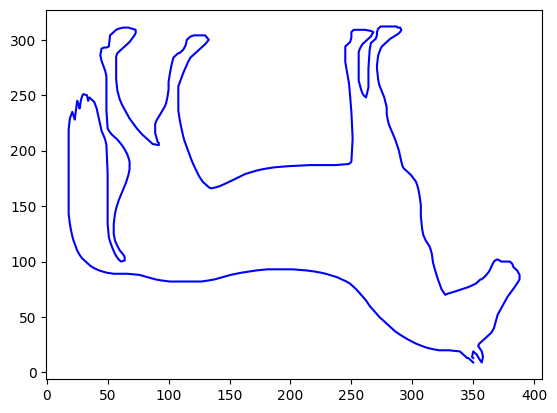

In [58]:
import matplotlib.pyplot as plt
zipped = zip(*np.squeeze(contours[0]))
x, y = list(zipped)
plt.plot(x, y, c="b")
plt.show()

상하구조(hierachy)는 1, 0, -1 값으로 이루어진 (컨투어 수 x 4) 크기의 행렬이다.  
- 1번 원소: 같은 수준의 다음 컨투어의 인덱스. 같은 수준의 다음 컨투어가 없으면 -1
- 2번 원소: 같은 수준의 이전 컨투어의 인덱스. 같은 수준의 이전 컨투어가 없으면 -1
- 3번 원소: 하위 자식 컨투어의 인덱스. 가장 하위 컨투어이면 -1
- 4번 원소: 부모 컨투어의 인덱스. 가장 상위의 컨투어이면 -1  

다음 값에서 첫번째 컨투어라인이 가장 상위 컨투어라는 것을 알 수 있다.

In [59]:
hierachy

array([[[-1, -1,  1, -1],
        [-1, -1, -1,  0]]], dtype=int32)

drawContours 함수를 사용하면 컨투어 정보에서 비트맵 이미지를 만들 수 있다.  

drawContours(image, contours, contourIdx, color)
- image: 원본 이미지
- contours: 컨투어 라인 정보
- contourIdx: 컨투어 라인 번호
- color: 색상

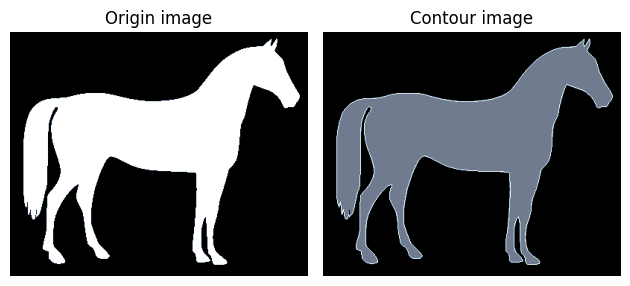

In [60]:
image = cv2.drawContours(img, contours, 0, 2)

plt.subplot(1, 2, 1)
plt.imshow(img_raw, cmap="bone")
plt.title("Origin image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image, cmap="bone")
plt.title("Contour image")
plt.axis("off")

plt.tight_layout()
plt.show()
